<a href="https://colab.research.google.com/github/OlliSensible/HW-Mathematics-for-Computer-Science/blob/HomeWork10/%D0%94%D0%9710_%D0%A1%D0%B5%D0%BD%D1%87%D0%B8%D0%BA_%D0%9E%D0%BB%D1%8C%D0%B3%D0%B8_%D0%86%D0%B3%D0%BE%D1%80%D1%96%D0%B2%D0%BD%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Опиши датасет власними словами
Виведи статистичний опис перших 100 записів датасету
Візьми для прогнозування всі параметри, що є в наявності.
Визнач ціль прогнозування (ціну).
Напишіть модель на DecisionTreeRegressor з використанням бібліотеки scikit-learn.
Зроби передбачення ціни нерухомості для перших 5 рядків.
Створи нову модель та спрогнозуй ціну будинку, використовуючи тільки координати будинку.
Зроби висновки, ціни яких будинків спрогнозовано не точно.

# 1. **Завантаж датасет "Нерухомість".**

In [ ]:
import pandas as pd

url = 'https://drive.google.com/uc?id=1MBjqyAMYWY95a2LAtQOzauyk43SgbN00'
df = pd.read_csv(url)

df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# **2. Опиши датасет власними словами**

**Датасет "Нерухомість"** - це скарбниця інформації про ринок нерухомості. Він містить дані про різні фактори, які можуть впливати на ціну нерухомості, такі як кількість кімнат, вік будинку, відстань до ближньої станції метро, кількість магазинів у районі та координати місцезнаходження.

Аналізуючи ці дані, ми можемо краще зрозуміти, які фактори є найбільш важливими для формування ціни нерухомості. Наприклад, ми можемо виявити, що квартири з більшою кількістю кімнат, розташовані в молодших будинках, ближче до станції метро та в районах з великою кількістю магазинів, зазвичай коштують дорожче.

Ці знання можна використовувати для розробки моделей, які передбачають ціни нерухомості на основі введених характеристик. Такі моделі можуть бути корисними для ріелторів, які хочуть оцінити вартість нерухомості, або для інвесторів, які хочуть прийняти обґрунтовані рішення про купівлю або продаж нерухомості.

**Ось кілька конкретних деталей, які можна виявити шляхом подальшого аналізу даних та їх візуалізації:**

Залежність ціни нерухомості від кількості кімнат. Чи є чітка кореляція між кількістю кімнат і ціною? Чи є певна кількість кімнат, яка є більш бажаною для покупців?
Залежність ціни нерухомості від віку будинку. Чи дорожчають будинки з часом? Чи є певний вік будинку, який є більш бажаним для покупців?
Залежність ціни нерухомості від відстані до станції метро. Чи є чітка кореляція між відстанню до станції метро і ціною? Чи є певна відстань, яка є більш бажаною для покупців?
Залежність ціни нерухомості від кількості магазинів у районі. Чи є чітка кореляція між кількістю магазинів у районі і ціною? Чи є певна кількість магазинів, яка є більш бажаною для покупців?
Залежність ціни нерухомості від географічних координат. Чи є відмінності в цінах нерухомості в різних районах міста? Чи є певні райони, які є більш бажаними для покупців?


Аналіз даних про нерухомість може бути захоплюючим і корисним завданням. Він може допомогти нам краще зрозуміти ринок нерухомості та прийняти обґрунтовані рішення про покупку або продаж нерухомості.

# **3. Виведи статистичний опис перших 100 записів датасету**
# Візьми для прогнозування всі параметри, що є в наявності.

In [ ]:
df.head(100).describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2013.16170,18.472000,1133.658832,4.170000,24.969346,121.533141,38.440000
std,29.011492,0.29955,11.516489,1308.867454,2.867635,0.012994,0.015743,13.481255
min,1.000000,2012.66700,0.000000,23.382840,0.000000,24.941550,121.484580,13.200000
25%,25.750000,2012.91700,9.850000,319.389925,1.000000,24.963045,121.529468,26.875000
50%,50.500000,2013.08300,16.450000,533.476200,4.000000,24.973490,121.539130,39.800000
75%,75.250000,2013.41700,29.775000,1420.772500,6.000000,24.977283,121.543910,48.025000
max,100.000000,2013.58300,40.900000,5512.038000,10.000000,25.014590,121.552820,70.100000


# **4. Визнач ціль прогнозування (ціну).**

In [ ]:
features = df.drop('Y house price of unit area', axis=1)

target = df['Y house price of unit area']

# **5. Напишіть модель на DecisionTreeRegressor з використанням бібліотеки scikit-learn.**


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

# **6. Зроби передбачення ціни нерухомості для перших 5 рядків.**

In [ ]:
predictions_first_5 = model.predict(features.head())

print("Прогнозування ціни для перших 5 рядків:")
print(predictions_first_5)

Прогнозування ціни для перших 5 рядків:
[53.3 42.2 47.3 54.8 43.1]


# **7. Створи нову модель та спрогнозуй ціну будинку, використовуючи тільки координати будинку.**

In [ ]:
coordinates_only = features[['X5 latitude', 'X6 longitude']]

X_train_coords, X_test_coords, y_train_coords, y_test_coords = train_test_split(coordinates_only, target, test_size=0.2, random_state=42)

model_coords = DecisionTreeRegressor()
model_coords.fit(X_train_coords, y_train_coords)

predictions_coords_first_5 = model_coords.predict(coordinates_only.head())
print("Прогнозування ціни для перших 5 рядків, використовуючи тільки координати будинку:")
print(predictions_coords_first_5)

Прогнозування ціни для перших 5 рядків, використовуючи тільки координати будинку:
[46.6  42.2  47.5  47.5  44.32]


# **8. Зроби висновки, ціни яких будинків спрогнозовано не точно.**

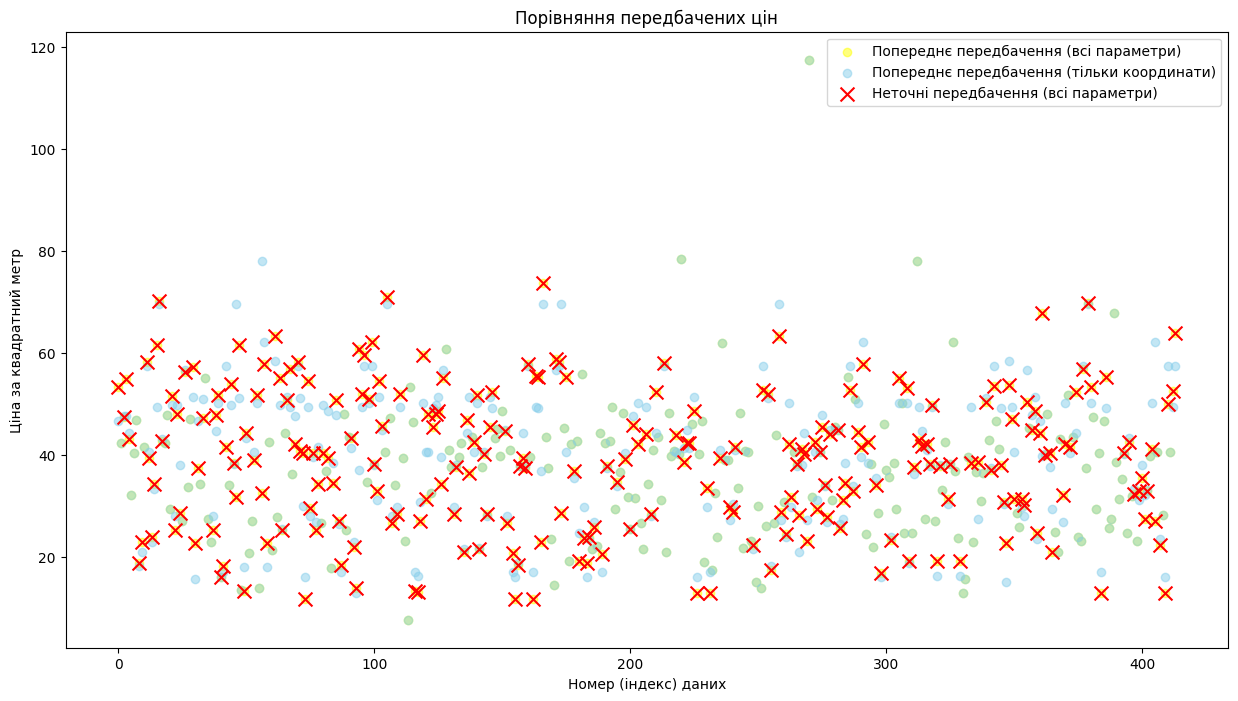

In [ ]:
import matplotlib.pyplot as plt

predictions_all = model.predict(features)
predictions_coords_all = model_coords.predict(coordinates_only)

comparison_df = pd.DataFrame({
    'Фактична ціна': target,
    'Попереднє передбачення (всі параметри)': predictions_all,
    'Попереднє передбачення (тільки координати)': predictions_coords_all
})

inaccurate_predictions = comparison_df[comparison_df['Попереднє передбачення (всі параметри)'] != comparison_df['Попереднє передбачення (тільки координати)']]

plt.figure(figsize=(15, 8))

plt.scatter(comparison_df.index, comparison_df['Попереднє передбачення (всі параметри)'], label='Попереднє передбачення (всі параметри)', color='yellow', alpha=0.5)

plt.scatter(comparison_df.index, comparison_df['Попереднє передбачення (тільки координати)'], label='Попереднє передбачення (тільки координати)', color='skyblue', alpha=0.5)

plt.scatter(inaccurate_predictions.index, inaccurate_predictions['Попереднє передбачення (всі параметри)'], label='Неточні передбачення (всі параметри)', color='red', marker='x', s=100)

plt.title('Порівняння передбачених цін')
plt.xlabel('Номер (індекс) даних')
plt.ylabel('Ціна за квадратний метр')
plt.legend()
plt.show()